In [2]:
import os
import pandas as pd
excel_names=[]
for excel_name in os.listdir("./data"):
    excel_names.append(excel_name)

df_list=[]
for excel_name in excel_names:
    filename="./data/{}".format(excel_name)
    df=pd.read_csv(filename,sep=",")
    df_list.append(df)
df_merge=pd.concat(df_list)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7850 entries, 0 to 233
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      7850 non-null   object 
 1   类目名称    7850 non-null   object 
 2   买家数     7850 non-null   int64  
 3   成交金额    7850 non-null   int64  
 4   搜索人数    7850 non-null   int64  
 5   成交金额占比  7850 non-null   object 
 6   成交金额同比  7850 non-null   object 
 7   成交人数占比  7850 non-null   object 
 8   成交人数同比  7850 non-null   object 
 9   客单价     7850 non-null   float64
 10  UV价值    7850 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 735.9+ KB


In [3]:
new_date=df_merge['日期'].str.split("|", n = 1, expand = True) 
df_merge['开始日期']=new_date[0]
df_merge['结束日期']=new_date[1]
df_merge['开始日期']=pd.to_datetime(df_merge['开始日期'].astype(str),format='%Y-%m-%d')
df_merge['结束日期']=pd.to_datetime(df_merge['结束日期'].astype(str),format='%Y-%m-%d')
del df_merge['日期'] 
df_merge.set_index(df_merge['开始日期'])

,类目名称,买家数,成交金额,搜索人数,成交金额占比,成交金额同比,成交人数占比,成交人数同比,客单价,UV价值,开始日期,结束日期
开始日期,,,,,,,,,,,,
2017-10-01,手机保护套/壳,27524495,503205377,82138973,38.16%,70.34%,52.07%,11.20%,18.28,6.13,2017-10-01,2017-10-31
2017-10-01,手机贴膜,18384095,190704104,26656100,11.79%,28.26%,25.05%,16.74%,10.37,7.15,2017-10-01,2017-10-31
2017-10-01,手机零部件,2125787,189281648,15767938,11.72%,12.75%,5.28%,11.70%,89.04,12.00,2017-10-01,2017-10-31
2017-10-01,移动电源,2801112,188888518,14276910,11.70%,27.56%,7.22%,11.89%,67.43,13.23,2017-10-01,2017-10-31
2017-10-01,手机数据线,4178627,153248705,10788473,8.04%,68.09%,11.07%,22.33%,36.67,14.20,2017-10-01,2017-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,分压盒,1,2425,36,-,1488.67%,-,68.95%,2425.00,67.36,2020-09-01,2020-09-30
2020-09-01,白平衡镜,1,1826,56,-,-46.39%,-,11.19%,1826.00,32.61,2020-09-01,2020-09-30
2020-09-01,Lomo潜水盒,1,133,22,-,-90.94%,-,-72.61%,133.00,6.05,2020-09-01,2020-09-30


<AxesSubplot:xlabel='买家数', ylabel='成交金额'>

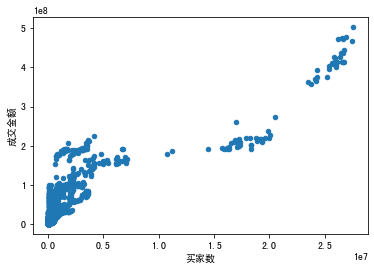

In [9]:
# result=df_merge[(df_merge["类目名称"]=="手机贴膜")]
df_test=df_merge.loc[:,["买家数","成交金额"]]
df_test.plot.scatter(x = '买家数', y = '成交金额')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 1 to 3
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   类目名称    108 non-null    object        
 1   买家数     108 non-null    int64         
 2   成交金额    108 non-null    int64         
 3   搜索人数    108 non-null    int64         
 4   成交金额占比  108 non-null    object        
 5   成交金额同比  108 non-null    object        
 6   成交人数占比  108 non-null    object        
 7   成交人数同比  108 non-null    object        
 8   客单价     108 non-null    float64       
 9   UV价值    108 non-null    float64       
 10  开始日期    108 non-null    datetime64[ns]
 11  结束日期    108 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 11.0+ KB


<AxesSubplot:title={'center':'买家数'}, xlabel='类目名称'>

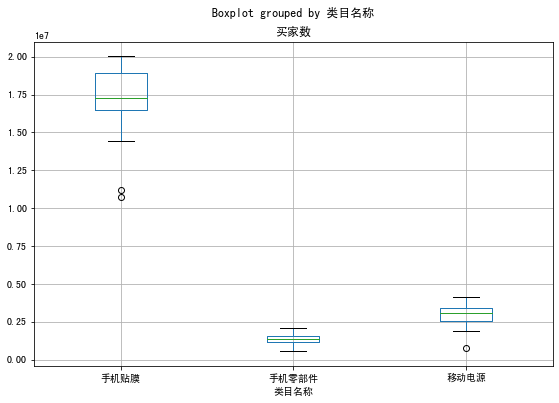

In [10]:
result=df_merge[(df_merge["类目名称"]=="手机贴膜")|(df_merge["类目名称"]=="手机零部件")|(df_merge["类目名称"]=="移动电源")]
result.set_index(result.开始日期)
result.info()
result.boxplot(column="买家数",by="类目名称",figsize=(9,6))

<AxesSubplot:title={'center':'买家数'}, xlabel='类目名称'>

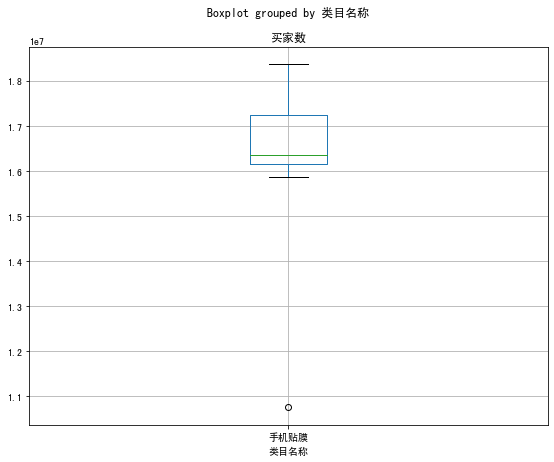

In [5]:
result.head(10).boxplot(column="买家数",by="类目名称",figsize=(9,7))

In [6]:
from pyecharts import options as opts
from pyecharts.charts import Line

(
    Line()
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(is_show=True),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
    .add_xaxis(xaxis_data=result.开始日期.dt.strftime("%Y-%m-%d").to_list())
    .add_yaxis(
        series_name="买家数",
        y_axis=result["买家数"],
        symbol="emptyCircle1",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="搜索人数",
        y_axis=result["搜索人数"],
        symbol="emptyCircle2",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .render_notebook()
)